### Case 2 - Offshore windfarm - AC Substation - DC Collection Cable - HVDC Converter - Electrolyser & DCAC Converter
This notebook shows the basics of Case 2 as suggested by Wouter van den Haak:

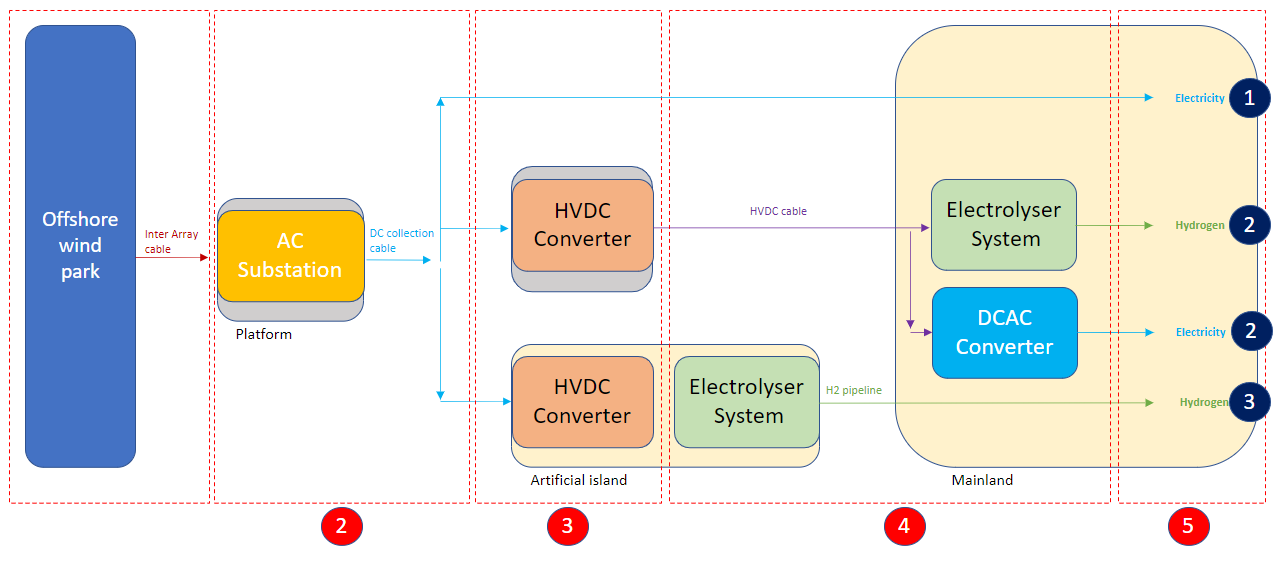

#### 0. Import basic methods (a.o. from source2.py)

In [1]:
from source2 import *
import numpy as np

In [2]:
# load basic info from the Input sheet
mapping = load_input_from_xls(filename=r'Case 2 - Input Sheet.xlsm')
Inputs = extract_scenario(mapping, 'Scenario1')

##### 1. prepare input data and generate objects
We are including the following elements:

##### 1.1.1 Foundations and cables

In [3]:
foundation_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Foundation & cable')
foundation_data['depreciation_rate']=1/foundation_data['economic_lifetime']
display(foundation_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Foundation & cable',
 'escalation_base_year': 2023.0,
 'escalation_rate': 0.02,
 'capex_per_unit': 934204.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [4]:
Foundation = Object(**foundation_data)
# hier heb je alleen het object met inputs

In [5]:
Foundation.generate_cashflows(startyear=2023, lifecycle=29, debug=False)
# na deze regel heeft Turbine.df (dataframe met alleen Capex, Opex en Residuals)

TypeError: 'float' object cannot be interpreted as an integer

##### 1.1.2 Turbines

In [6]:
turbine_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Turbine')
turbine_data['depreciation_rate']=1/turbine_data['economic_lifetime']
display(turbine_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Turbine',
 'escalation_base_year': 2023.0,
 'escalation_rate': 0.02,
 'capex_per_unit': 1139979.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1.0,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1.0,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1.0,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.08,
 'residual_value': 0.01}

In [7]:
Turbine = Object(**turbine_data)
# hier heb je alleen het object met inputs

In [8]:
Turbine.generate_cashflows(startyear=2023, lifecycle=29, debug=False)
# na deze regel heeft Turbine.df (dataframe met alleen Capex, Opex en Residuals)

##### 1.2.1 AC Substation

In [9]:
AC_substation_data = get_object_data(Inputs=Inputs, 
                               subsystem='AC Substation & Transport', 
                               element='AC Substation & Transport',
                               component='AC Substation')
AC_substation_data['depreciation_rate']=1/AC_substation_data['economic_lifetime']
display(AC_substation_data)

{'sub_system': 'AC Substation & Transport',
 'element': 'AC Substation & Transport',
 'component': 'AC Substation',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 239301,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 40,
 'depreciation_flag': 1,
 'depreciation_rate': 0.025,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.2,
 'residual_value': 0.01}

In [10]:
ACStation = Object(**AC_substation_data)

In [11]:
ACStation.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.2.2 DC Collection Cable

In [12]:
DC_collection_cable_data = get_object_data(Inputs=Inputs, 
                               subsystem='AC Substation & Transport', 
                               element='AC Substation & Transport',
                               component='DC collection cable')
DC_collection_cable_data['depreciation_rate']=1/DC_collection_cable_data['economic_lifetime']
display(DC_collection_cable_data)

{'sub_system': 'AC Substation & Transport',
 'element': 'AC Substation & Transport',
 'component': 'DC collection cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 470134,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 40,
 'depreciation_flag': 1,
 'depreciation_rate': 0.025,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.2,
 'residual_value': 0.01}

In [13]:
DCCollectionCable = Object(**DC_collection_cable_data)

In [14]:
DCCollectionCable.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.3.1 HVDC Converter

In [15]:
HVDC_converter_data = get_object_data(Inputs=Inputs, 
                               subsystem='Converter & Transport', 
                               element='Converter',
                               component='HVDC Converter')
HVDC_converter_data['depreciation_rate']=1/HVDC_converter_data['economic_lifetime']
display(HVDC_converter_data)

{'sub_system': 'Converter & Transport',
 'element': 'Converter',
 'component': 'HVDC Converter',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 472500,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [16]:
HVDCConverter = Object(**HVDC_converter_data)

In [17]:
HVDCConverter.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.3.2 HVDC Cable

In [18]:
HVDC_cable_data = get_object_data(Inputs=Inputs, 
                               subsystem='Converter & Transport', 
                               element='Converter',
                               component='HVDC Cable')
HVDC_cable_data['depreciation_rate']=1/HVDC_cable_data['economic_lifetime']
display(HVDC_cable_data)

{'sub_system': 'Converter & Transport',
 'element': 'Converter',
 'component': 'HVDC Cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 232500,
 'capex_per_unit_units': 'EUR / m',
 'unit': 130000,
 'unit_units': 'm',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [19]:
HVDCCable = Object(**HVDC_cable_data)

In [20]:
HVDCCable.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.4.1 Electrolyser

In [21]:
Electrolyser_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Electrolyser')
Electrolyser_data['depreciation_rate']=1/Electrolyser_data['economic_lifetime']
display(Electrolyser_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Electrolyser',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 585000,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 25,
 'depreciation_flag': 1,
 'depreciation_rate': 0.04,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [22]:
Electrolyser = Object(**Electrolyser_data)

In [23]:
Electrolyser.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.4.2 Desalination Unit

In [24]:
Desalination_unit_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Desalination unit')
Desalination_unit_data['depreciation_rate']=1/Desalination_unit_data['economic_lifetime']
display(Desalination_unit_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Desalination unit',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 3900,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [25]:
DesalinationUnit = Object(**Desalination_unit_data)

In [26]:
DesalinationUnit.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.4.3 Compressor Unit

In [27]:
Compressor_unit_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Compressor unit')
Compressor_unit_data['depreciation_rate']=1/Compressor_unit_data['economic_lifetime']
display(Compressor_unit_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Compressor unit',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 169000,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [28]:
CompressorUnit = Object(**Compressor_unit_data)

In [29]:
CompressorUnit.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.4.4 Storage Unit

In [30]:
Storage_unit_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Storage unit')
Storage_unit_data['depreciation_rate']=1/Storage_unit_data['economic_lifetime']
display(Storage_unit_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Storage unit',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 338000,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [31]:
StorageUnit = Object(**Storage_unit_data)

In [32]:
StorageUnit.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.4.5 Compressor after storage

In [33]:
Compressor_after_storage_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Compressor after storage')
Compressor_after_storage_data['depreciation_rate']=1/Compressor_after_storage_data['economic_lifetime']
display(Compressor_after_storage_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Compressor after storage',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 11700,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [34]:
CompressorAfterStorage = Object(**Compressor_after_storage_data)

In [35]:
CompressorAfterStorage.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.4.6 DCAC Converter

In [36]:
DCAC_converter_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electricity',
                               component='DCAC Converter')
DCAC_converter_data['depreciation_rate']=1/DCAC_converter_data['economic_lifetime']
display(DCAC_converter_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electricity',
 'component': 'DCAC Converter',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 37077,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 25,
 'depreciation_flag': 1,
 'depreciation_rate': 0.04,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.25,
 'residual_value': 0.01}

In [37]:
DCACConverter = Object(**DCAC_converter_data)

In [38]:
DCACConverter.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 1.4.7 Mainland

In [39]:
Mainland_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Facility location',
                               component='Mainland')
Mainland_data['depreciation_rate']=1/Mainland_data['economic_lifetime']
display(Mainland_data)

issue detected


{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Facility location',
 'component': 'Mainland',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 6000,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 80,
 'depreciation_flag': 1,
 'depreciation_rate': 0.0125,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.1,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.01,
 'residual_value': []}

In [40]:
Mainland = Object(**Mainland_data)

In [41]:
Mainland.generate_cashflows(startyear=2023, lifecycle=29, debug=False)

##### 2. Generate combined cashflows

In [42]:
# place escalated revenue values in the cashflow dataframe
df_combined=combine_cashflow_dataframes([Foundation.df, Turbine.df, ACStation.df, DCCollectionCable.df, HVDCConverter.df, HVDCCable.df, Electrolyser.df, DesalinationUnit.df, CompressorUnit.df, StorageUnit.df, CompressorAfterStorage.df, DCACConverter.df, Mainland.df])

##### 3. Calculate NPVs

In [43]:
df_combined_npv=calculate_npv(df_combined, 2023, WACC=0.0984)

##### 4. Plots

##### 4.1. NPV Plot

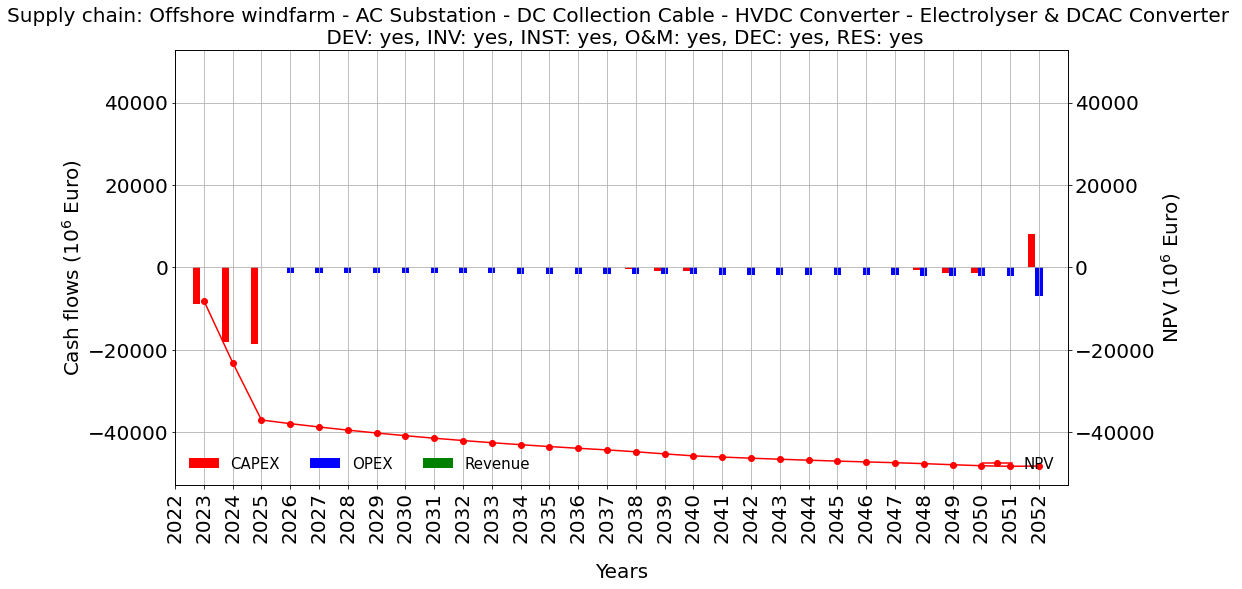

In [44]:
# DEV: Project development costs
# INV: Investment / procurement costs
# INST: Installation / construction costs 
# O&M: Yearly variable / O&M costs 
# DEC: Decommissioning costs 
# RES: Residual value   

create_npv_plot(df_combined_npv, title='Supply chain: Offshore windfarm - AC Substation - DC Collection Cable - HVDC Converter - Electrolyser & DCAC Converter \n DEV: yes, INV: yes, INST: yes, O&M: yes, DEC: yes, RES: yes' )

##### 4.2. Pie chart

In [116]:
# collect the npv calculations per item (without revenues)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
Turbine.df_npv = calculate_npv(Turbine.df, 2023, WACC=0.0984)
ACStation.df_npv = calculate_npv(ACStation.df, 2023, WACC=0.0984)
DCCollectionCable.df_npv = calculate_npv(DCCollectionCable.df, 2023, WACC=0.0984)
HVDCConverter.df_npv = calculate_npv(HVDCConverter.df, 2023, WACC=0.0984)
HVDCCable.df_npv = calculate_npv(HVDCCable.df, 2023, WACC=0.0984)
Electrolyser.df_npv = calculate_npv(Electrolyser.df, 2023, WACC=0.0984)
DesalinationUnit.df_npv = calculate_npv(DesalinationUnit.df, 2023, WACC=0.0984)
CompressorUnit.df_npv = calculate_npv(CompressorUnit.df, 2023, WACC=0.0984)
StorageUnit.df_npv = calculate_npv(StorageUnit.df, 2023, WACC=0.0984)
CompressorAfterStorage.df_npv = calculate_npv(CompressorAfterStorage.df, 2023, WACC=0.0984)
DCACConverter.df_npv = calculate_npv(DCACConverter.df, 2023, WACC=0.0984)
Mainland.df_npv = calculate_npv(Mainland.df, 2023, WACC=0.0984)


In [117]:
# prepare input for pie chart
labels = ['Foundations & cables', 'Turbines', 'AC Station', 'DC collection cable', 'HVDC Converter', 'HVDC Cable', 'Electrolyser', 'Desalination Unit', 'Compressor Unit', 'Storage Unit', 'Compressor after Storage', 'DCAC Converter', 'Mainland']
data = [
    -Foundation.df_npv.cashflow_sum.iloc[-1],
    -Turbine.df_npv.cashflow_sum.iloc[-1],
    -ACStation.df_npv.cashflow_sum.iloc[-1],
    -DCCollectionCable.df_npv.cashflow_sum.iloc[-1],
    -HVDCConverter.df_npv.cashflow_sum.iloc[-1],
    -HVDCCable.df_npv.cashflow_sum.iloc[-1],
    -Electrolyser.df_npv.cashflow_sum.iloc[-1],
    -DesalinationUnit.df_npv.cashflow_sum.iloc[-1],
    -CompressorUnit.df_npv.cashflow_sum.iloc[-1],
    -StorageUnit.df_npv.cashflow_sum.iloc[-1],
    -CompressorAfterStorage.df_npv.cashflow_sum.iloc[-1],
    -DCACConverter.df_npv.cashflow_sum.iloc[-1],
    -Mainland.df_npv.cashflow_sum.iloc[-1],
]   

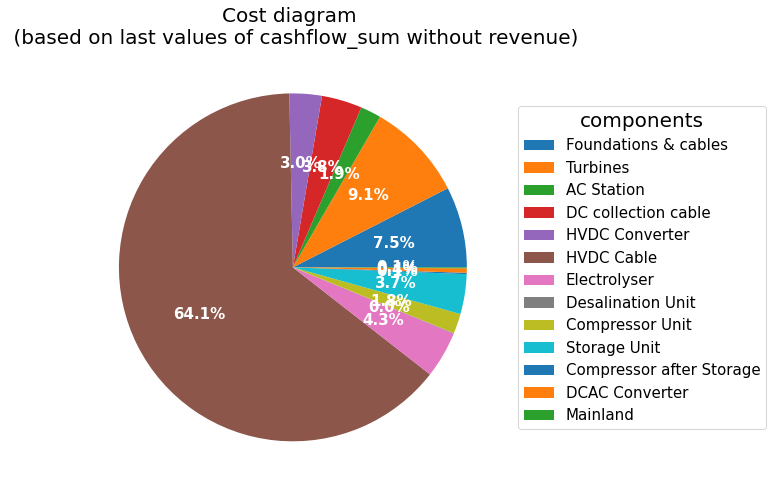

In [118]:
# create pie plot
fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="components",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
         fontsize=15)

plt.setp(autotexts, size=15, weight="bold")

ax.set_title("Cost diagram \n (based on last values of cashflow_sum without revenue)", fontsize=20)

plt.show()

##### 5. LCOE & LCOH

In [119]:
total_wind_energy_production_per_year = 3000 * 1000 * 4380  # parkcapacity * operational hours 
print('total_wind_energy_production_per_year: {:.0f} kWh'.format(total_wind_energy_production_per_year))

energy_after_inter_array_cable_loss = 0.99 * total_wind_energy_production_per_year
print('energy_after_inter_array_cable_loss (20 km): {:.0f} kWh'.format(energy_after_inter_array_cable_loss))

energy_after_DC_collection_cable_loss = 0.98 * energy_after_inter_array_cable_loss
print('energy_after_DC_collection_cable_loss (20 km): {:.0f} kWh'.format(energy_after_DC_collection_cable_loss))

energy_after_HVDC_cable_loss = 0.98 * energy_after_DC_collection_cable_loss
print('energy_after_HVDC_cable_loss: {:.0f} kWh'.format(energy_after_HVDC_cable_loss))


total_wind_energy_production: 354780000000 kWh
energy_after_inter_array_cable_loss (20 km): 347684400000 kWh
energy_after_AC_collection_cable_loss (20 km): 340730712000 kWh


In [120]:
total_energy = energy_after_AC_collection_cable_loss # kWh
total_cost = sum(data)            # EU

In [121]:
LCOE = total_cost / total_energy
print('LCOE: {:.2f} EU/kWh'.format(LCOE))

LCOE: 0.27 EU/kWh


In [122]:
# ToDo: also calculate efficiency (part of the originally produced energy that reaches the shore)
SupplyChain_efficiency = energy_after_AC_collection_cable_loss / total_wind_energy_production
print('SupplyChain efficiency: {} %'.format(SupplyChain_efficiency*100))

SupplyChain efficiency: 96.04 %


##### 6 - Revenues

In [123]:
df_combined=combine_cashflow_dataframes([Foundation.df, Turbine.df, ACStation.df, DCCollectionCable.df, HVDCConverter.df, HVDCCable.df, Electrolyser.df, DesalinationUnit.df, CompressorUnit.df, StorageUnit.df, CompressorAfterStorage.df, DCACConverter.df, Mainland.df])

In [2]:
# calculate energy production per year
total_wind_energy_production_per_year = 3000 * 1000 * 4380  # parkcapacity * operational hours 
print('total_wind_energy_production: {:.0f} kWh per year'.format(total_wind_energy_production_per_year))

energy_after_inter_array_cable_loss = 0.99 * total_wind_energy_production_per_year
print('energy_after_inter_array_cable_loss (20 km): {:.0f} kWh per year'.format(energy_after_inter_array_cable_loss))

energy_after_DC_collection_cable_loss = 0.98 * energy_after_inter_array_cable_loss
print('energy_after_DC_collection_cable_loss (20 km): {:.0f} kWh per year'.format(energy_after_DC_collection_cable_loss))

energy_after_HVDC_cable_loss = 0.98 * energy_after_DC_collection_cable_loss
print('energy_after_HVDC_cable_loss: {:.0f} kWh per year'.format(energy_after_HVDC_cable_loss))

kWh_to_tons = 50000 #kWH/tons hydrogen

dedicated_electrolyser_energy = 0.5

dedicated_DCAC_energy = (1 - dedicated_electrolyser_energy)

energy_after_electrolysis = (energy_after_HVDC_cable_loss * dedicated_electrolyser_energy) / kWh_to_tons
print('energy_after_electrolysis: {:.0f} tons hydrogen per year'.format(energy_after_electrolysis))

energy_after_DCAC_converter = (energy_after_HVDC_cable_loss * dedicated_DCAC_energy)
print('energy_after_DCAC_converter: {:.0f} kWh per year'.format(energy_after_DCAC_converter))

#H2 Pipeline loss?
#Electricity cable loss?


total_wind_energy_production: 13140000000 kWh per year
energy_after_inter_array_cable_loss (20 km): 13008600000 kWh per year
energy_after_DC_collection_cable_loss (20 km): 12748428000 kWh per year
energy_after_HVDC_cable_loss: 12493459440 kWh per year
energy_after_electrolysis: 124935 tons hydrogen per year
energy_after_DCAC_converter: 6246729720 kWh per year


In [125]:
# create escalation list
escalation_base_year=2023   # dit moeten we misschien aan het begin van het notebook opgeven
lifecycle=29                # dit moeten we misschien aan het begin van het notebook opgeven
escalation_rate=0.02        # dit moeten we misschien aan het begin van het notebook opgeven

escalation_years = []
escalation_values = []
previous = 1
for index, year in enumerate(list(range(escalation_base_year, escalation_base_year + lifecycle + 1))):
    previous = previous * (1 + escalation_rate)
    escalation_years.append(year)    
    escalation_values.append(previous)

In [126]:
# escalate revenue values
construction_duration = 3  # nu zet hij automatisch de eerste drie jaren op nul?
revenue_years = list(range(escalation_base_year + construction_duration, escalation_base_year + lifecycle + 1))
revenue_value = energy_after_DCAC_converter_loss * 0.15 # LCOE: 0.12 EU/kWh (see below) ... take 3 ct profit?

In [127]:
revenue_values=[]
for i, revenue_year in enumerate(revenue_years):
    revenue_values.append(revenue_value * escalation_values[
        [index for index, escalation_year in enumerate(escalation_years) if escalation_year == revenue_year][0]])

In [128]:
for i, revenue_year in enumerate(revenue_years):
    df_combined.loc[revenue_year, 'revenue'] = revenue_values[i]

In [129]:
df_combined_npv = calculate_npv(df_combined, 2023, WACC=0.0984)

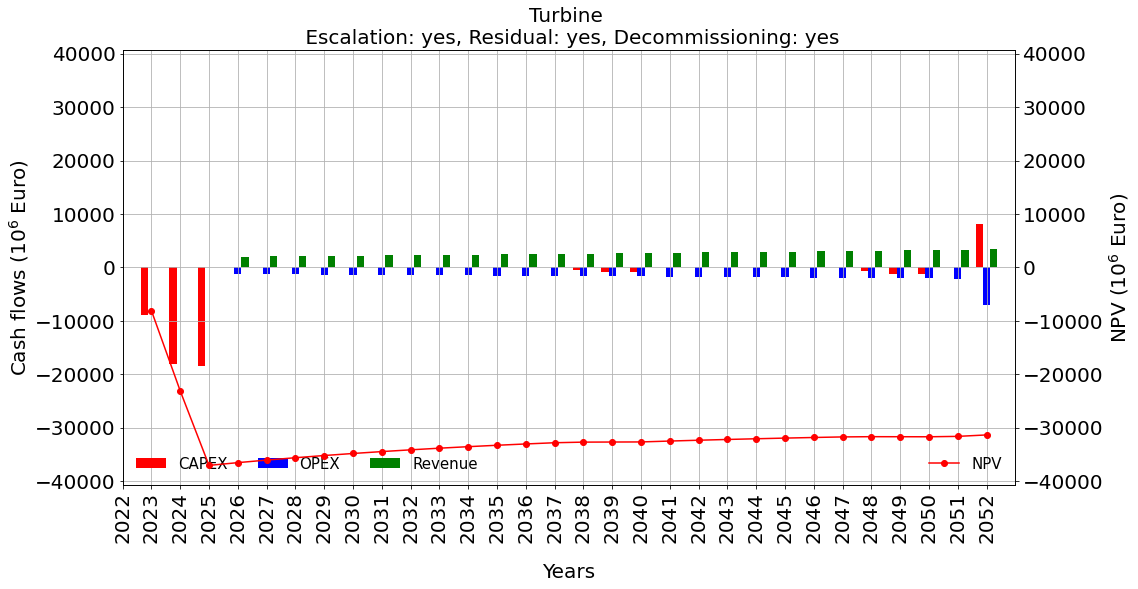

In [130]:
create_npv_plot(df_combined_npv, title='Turbine \n Escalation: yes, Residual: yes, Decommissioning: yes' )

##### 9 - Pie Plot

In [131]:
# collect the npv calculations per item (without revenues)
Turbine.df_npv = calculate_npv(Turbine.df, 2023, WACC=0.0984)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
ACStation.df_npv = calculate_npv(ACStation.df, 2023, WACC=0.0984)
DCCollectionCable.df_npv = calculate_npv(DCCollectionCable.df, 2023, WACC=0.0984)
DCACConverter.df_npv = calculate_npv(DCACConverter.df, 2023, WACC=0.0984)
Mainland.df_npv = calculate_npv(Mainland.df, 2023, WACC=0.0984)

In [132]:
# prepare input for pie plot
labels = ['Foundations & cables', 'Turbines', 'AC Station', 'DC collection cable', 'DCAC Converter', 'Mainland']
data = [
    -Foundation.df_npv.cashflow_sum.iloc[-1],
    -Turbine.df_npv.cashflow_sum.iloc[-1],
    -ACStation.df_npv.cashflow_sum.iloc[-1],
    -DCCollectionCable.df_npv.cashflow_sum.iloc[-1],
    -DCACConverter.df_npv.cashflow_sum.iloc[-1],
    -Mainland.df_npv.cashflow_sum.iloc[-1],
]   

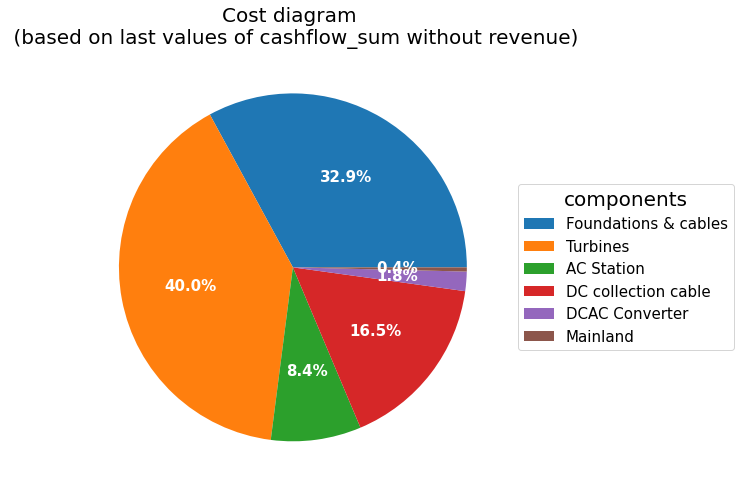

In [133]:
# create pie plot
fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="components",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
         fontsize=15)

plt.setp(autotexts, size=15, weight="bold")

ax.set_title("Cost diagram \n (based on last values of cashflow_sum without revenue)", fontsize=20)

plt.show()

##### 10 - LCOE

In [134]:
total_wind_energy_production_per_year = 3000 * 1000 * 4380 * 27  # parkcapacity * operational hours * operational lifecycle
print('total_wind_energy_production_per_year: {:.0f} kWh'.format(total_wind_energy_production_per_year))

energy_after_inter_array_cable_loss = 0.99 * total_wind_energy_production_per_year
print('energy_after_inter_array_cable_loss (20 km): {:.0f} kWh'.format(energy_after_inter_array_cable_loss))

energy_after_DC_collection_cable_loss = 0.98 * energy_after_inter_array_cable_loss
print('energy_after_DC_collection_cable_loss (20 km): {:.0f} kWh'.format(energy_after_DC_collection_cable_loss))

energy_after_DCAC_converter_loss = 0.98 * energy_after_DC_collection_cable_loss
print('energy_after_DCAC_converter_loss: {:.0f} kWh'.format(energy_after_DCAC_converter_loss))

total_wind_energy_production_per_year: 354780000000 kWh
energy_after_inter_array_cable_loss (20 km): 351232200000 kWh
energy_after_DC_collection_cable_loss (20 km): 344207556000 kWh
energy_after_DCAC_converter_loss: 337323404880 kWh


In [135]:
total_energy = energy_after_DCAC_converter_loss # kWh
total_cost = sum(data)            # EU

In [136]:
LCOE = total_cost / total_energy
print('LCOE: {:.2f} EU/kWh'.format(LCOE))

LCOE: 0.06 EU/kWh
